1. Apply Gaussian noise to Figure 1, and then use the following to restore the image:

i. Geometric Mean filter
ii. Harmonic Mean filter
iii. Contra-harmonic Mean filter

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/kaggle/input/lab-07/lab_07_image/Picture1.png', cv2.IMREAD_GRAYSCALE)




In [16]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=20):
    gauss = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Geometric mean filter
def geometric_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size].astype(np.float32) + 1e-5
            result[i, j] = np.exp(np.mean(np.log(window)))
    return np.clip(result, 0, 255).astype(np.uint8)

# Harmonic mean filter
def harmonic_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size].astype(np.float32) + 1e-5
            result[i, j] = (kernel_size**2) / np.sum(1.0 / window)
    return np.clip(result, 0, 255).astype(np.uint8)

# Contra-harmonic mean filter
def contra_harmonic_mean_filter(image, kernel_size=3, Q=1.5):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size].astype(np.float32)
            num = np.sum(window ** (Q + 1))
            denom = np.sum(window ** Q) + 1e-5
            result[i, j] = num / denom
    return np.clip(result, 0, 255).astype(np.uint8)

# Apply Gaussian noise
noisy_image = add_gaussian_noise(img)

# Apply all filters
geo_filtered = geometric_mean_filter(noisy_image)
harm_filtered = harmonic_mean_filter(noisy_image)
contra_filtered = contra_harmonic_mean_filter(noisy_image, Q=1.5)



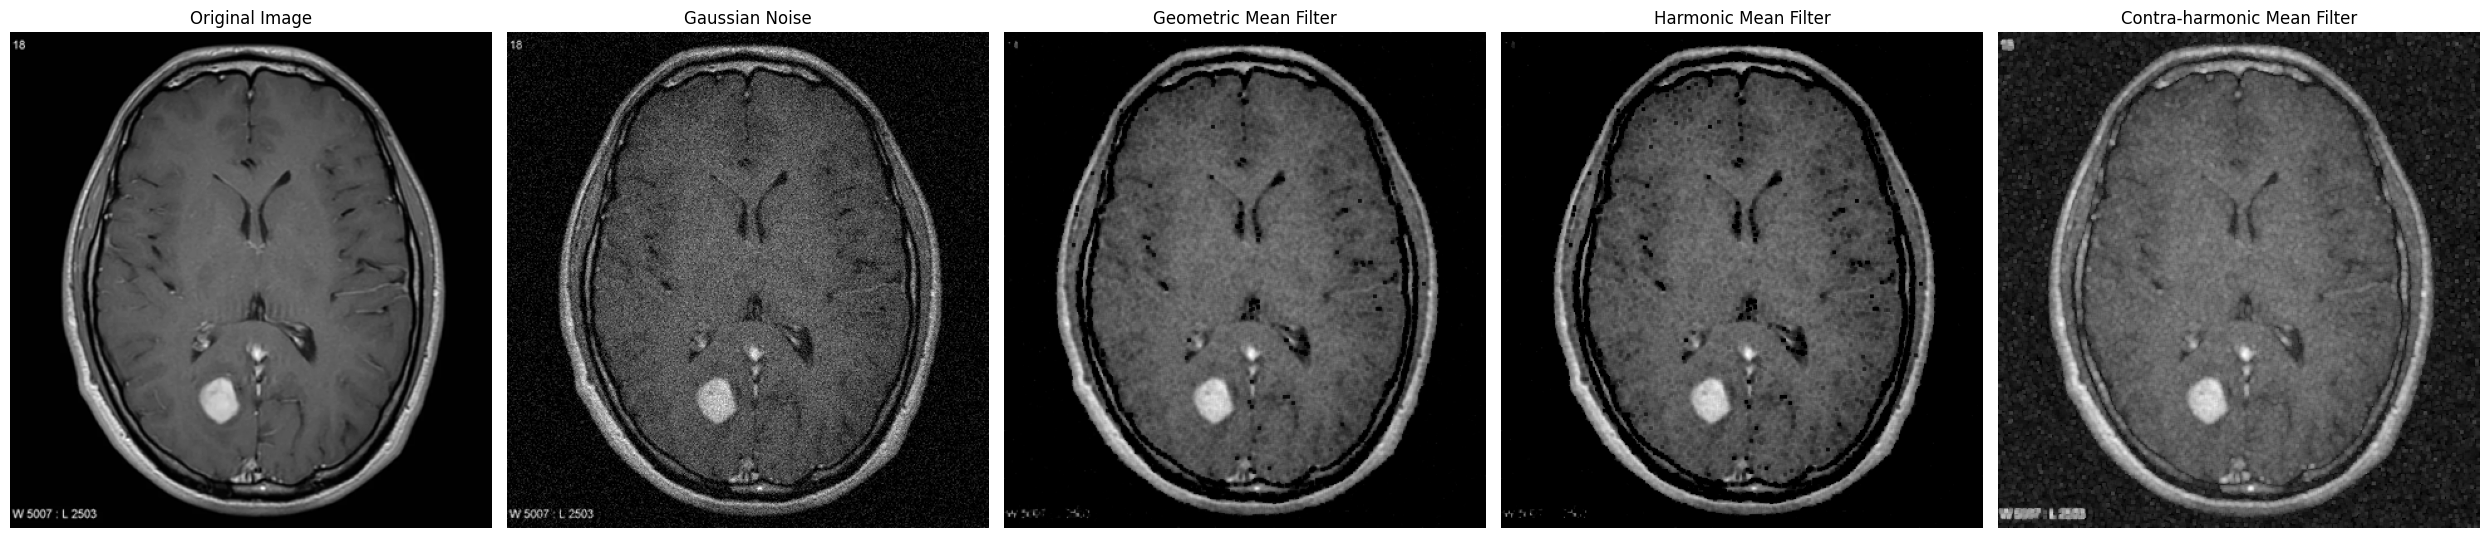

In [18]:
# Plotting all results
titles = ['Original Image', 'Gaussian Noise', 
          'Geometric Mean Filter', 'Harmonic Mean Filter', 'Contra-harmonic Mean Filter']
images = [img, noisy_image, geo_filtered, harm_filtered, contra_filtered]

plt.figure(figsize=(25, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

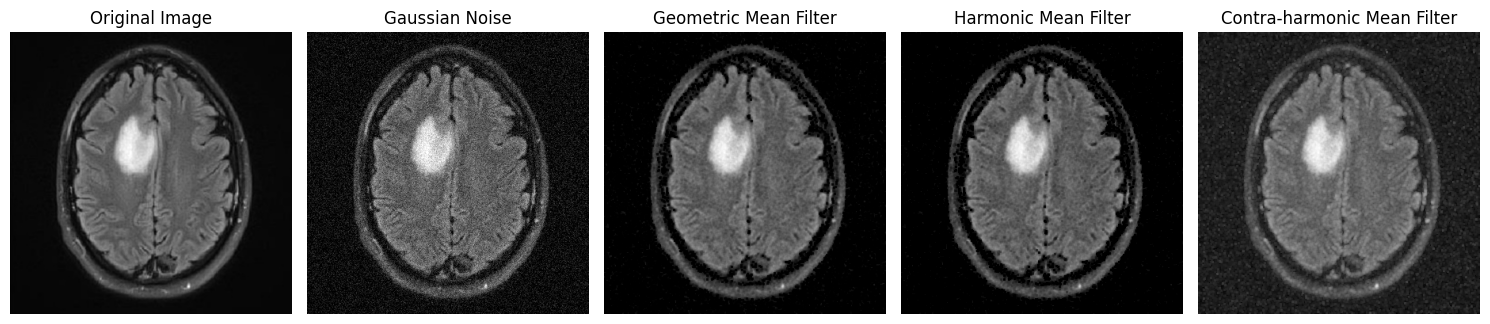

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/kaggle/input/lab-07/lab_07_image/Picture2.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=20):
    gauss = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Geometric mean filter
def geometric_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size].astype(np.float32) + 1e-5
            result[i, j] = np.exp(np.mean(np.log(window)))
    return np.clip(result, 0, 255).astype(np.uint8)

# Harmonic mean filter
def harmonic_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size].astype(np.float32) + 1e-5
            result[i, j] = (kernel_size**2) / np.sum(1.0 / window)
    return np.clip(result, 0, 255).astype(np.uint8)

# Contra-harmonic mean filter
def contra_harmonic_mean_filter(image, kernel_size=3, Q=1.5):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size].astype(np.float32)
            num = np.sum(window ** (Q + 1))
            denom = np.sum(window ** Q) + 1e-5
            result[i, j] = num / denom
    return np.clip(result, 0, 255).astype(np.uint8)

# Apply Gaussian noise
noisy_image = add_gaussian_noise(img)

# Apply all filters
geo_filtered = geometric_mean_filter(noisy_image)
harm_filtered = harmonic_mean_filter(noisy_image)
contra_filtered = contra_harmonic_mean_filter(noisy_image, Q=1.5)

# Plotting all results
titles = ['Original Image', 'Gaussian Noise', 
          'Geometric Mean Filter', 'Harmonic Mean Filter', 'Contra-harmonic Mean Filter']
images = [img, noisy_image, geo_filtered, harm_filtered, contra_filtered]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


2. Apply Gaussian noise to Figure 1, and then use the following order statistic filters to
restore the image:
i. Median filter
ii. Maximum filter
iii. Minimum filter
iv. Midpoint filter
v. Alpha-trimmed filter
vi. Trimmed filter

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, maximum_filter, minimum_filter


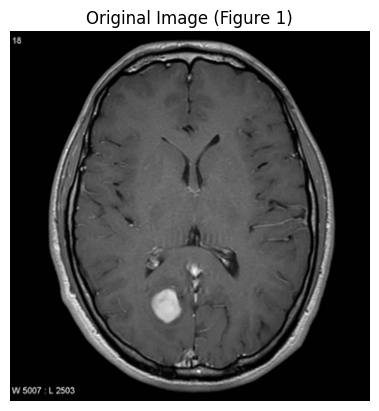

In [28]:
# Load grayscale image
image = cv2.imread('/kaggle/input/lab-07/lab_07_image/Picture1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image (Figure 1)")
plt.axis('off')
plt.show()


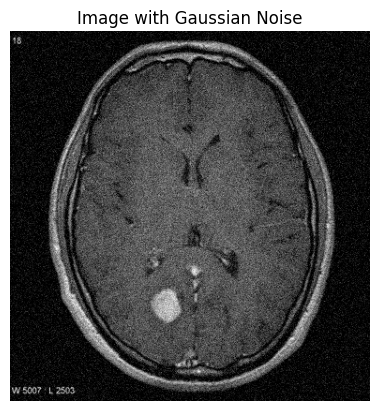

In [29]:
def add_gaussian_noise(image, mean=0, std=20):
    gauss = np.random.normal(mean, std, image.shape).astype('float32')
    noisy_img = image.astype('float32') + gauss
    noisy_img = np.clip(noisy_img, 0, 255).astype('uint8')
    return noisy_img

noisy_image = add_gaussian_noise(image)
plt.imshow(noisy_image, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')
plt.show()


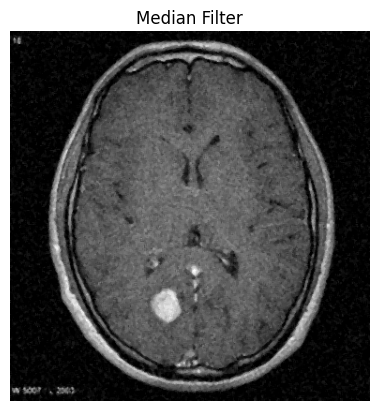

In [30]:
median_filtered = median_filter(noisy_image, size=3)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')
plt.show()


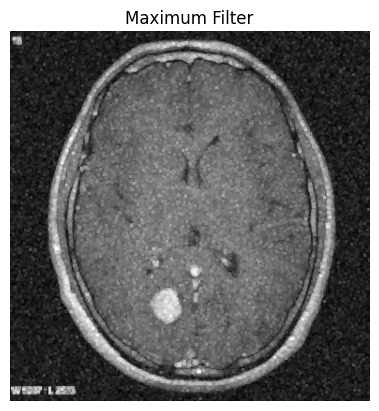

In [31]:
max_filtered = maximum_filter(noisy_image, size=3)
plt.imshow(max_filtered, cmap='gray')
plt.title("Maximum Filter")
plt.axis('off')
plt.show()


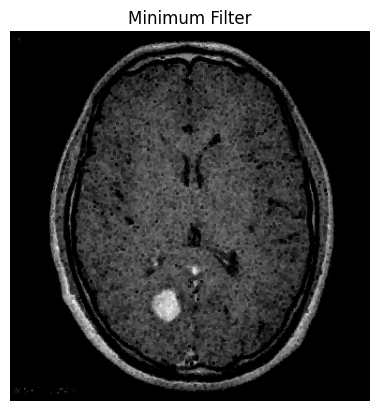

In [32]:
min_filtered = minimum_filter(noisy_image, size=3)
plt.imshow(min_filtered, cmap='gray')
plt.title("Minimum Filter")
plt.axis('off')
plt.show()


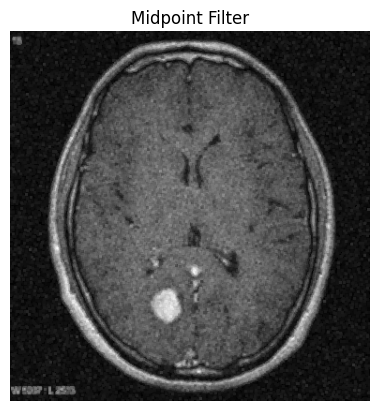

In [33]:
def midpoint_filter(image, size=3):
    max_filt = maximum_filter(image, size=size)
    min_filt = minimum_filter(image, size=size)
    mid = ((max_filt.astype(np.uint16) + min_filt.astype(np.uint16)) // 2).astype(np.uint8)
    return mid

midpoint_filtered = midpoint_filter(noisy_image)
plt.imshow(midpoint_filtered, cmap='gray')
plt.title("Midpoint Filter")
plt.axis('off')
plt.show()


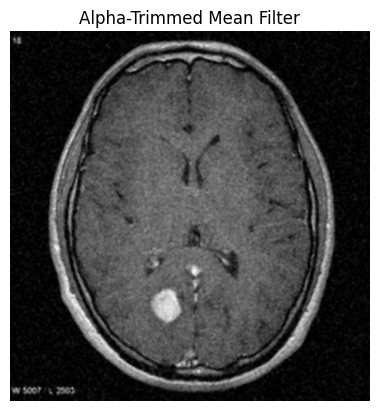

In [34]:
def alpha_trimmed_mean_filter(image, size=3, d=4):
    assert d % 2 == 0, "d must be even"
    pad = size // 2
    padded = np.pad(image, pad, mode='reflect')
    output = np.zeros_like(image)

    for i in range(pad, padded.shape[0] - pad):
        for j in range(pad, padded.shape[1] - pad):
            window = padded[i - pad:i + pad + 1, j - pad:j + pad + 1].flatten()
            window.sort()
            trimmed = window[d//2 : -d//2]  # remove d/2 lowest and d/2 highest
            output[i - pad, j - pad] = np.mean(trimmed)

    return output.astype(np.uint8)

alpha_trimmed = alpha_trimmed_mean_filter(noisy_image, size=3, d=4)
plt.imshow(alpha_trimmed, cmap='gray')
plt.title("Alpha-Trimmed Mean Filter")
plt.axis('off')
plt.show()


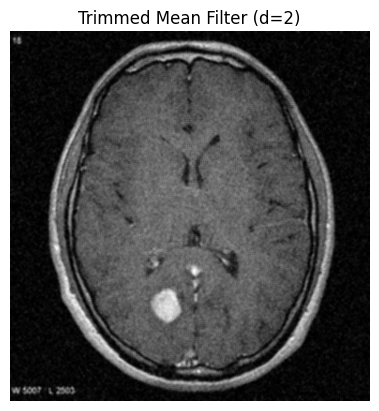

In [35]:
trimmed_filtered = alpha_trimmed_mean_filter(noisy_image, size=3, d=2)
plt.imshow(trimmed_filtered, cmap='gray')
plt.title("Trimmed Mean Filter (d=2)")
plt.axis('off')
plt.show()


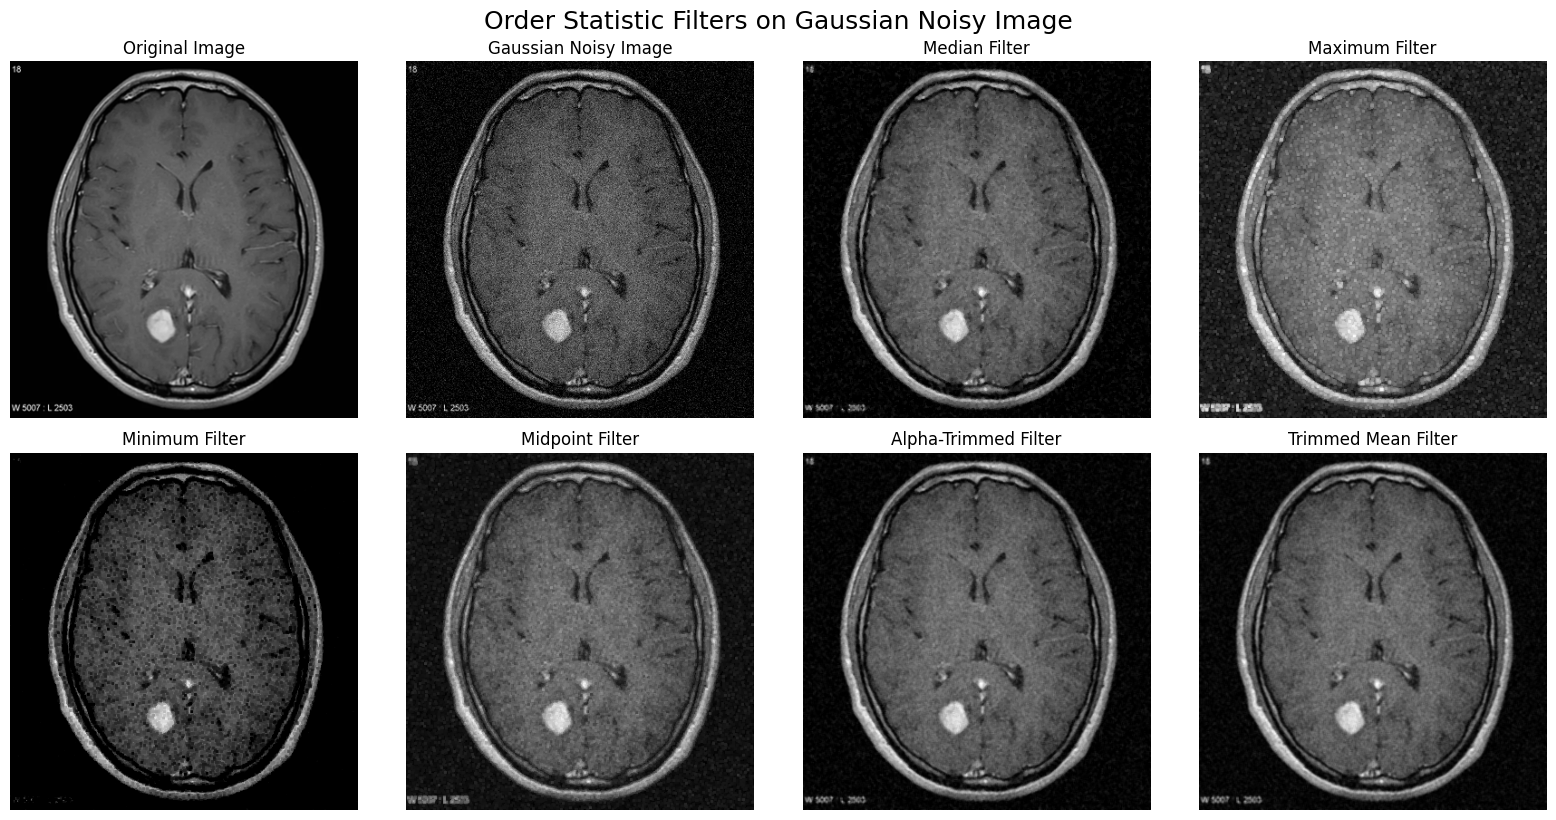

In [36]:
# Prepare all filtered images
images = [
    image,
    noisy_image,
    median_filtered,
    max_filtered,
    min_filtered,
    midpoint_filtered,
    alpha_trimmed,
    trimmed_filtered
]

titles = [
    "Original Image",
    "Gaussian Noisy Image",
    "Median Filter",
    "Maximum Filter",
    "Minimum Filter",
    "Midpoint Filter",
    "Alpha-Trimmed Filter",
    "Trimmed Mean Filter"
]

# Plot all images in a 2x4 grid
plt.figure(figsize=(16, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Order Statistic Filters on Gaussian Noisy Image", fontsize=18, y=1.02)
plt.show()


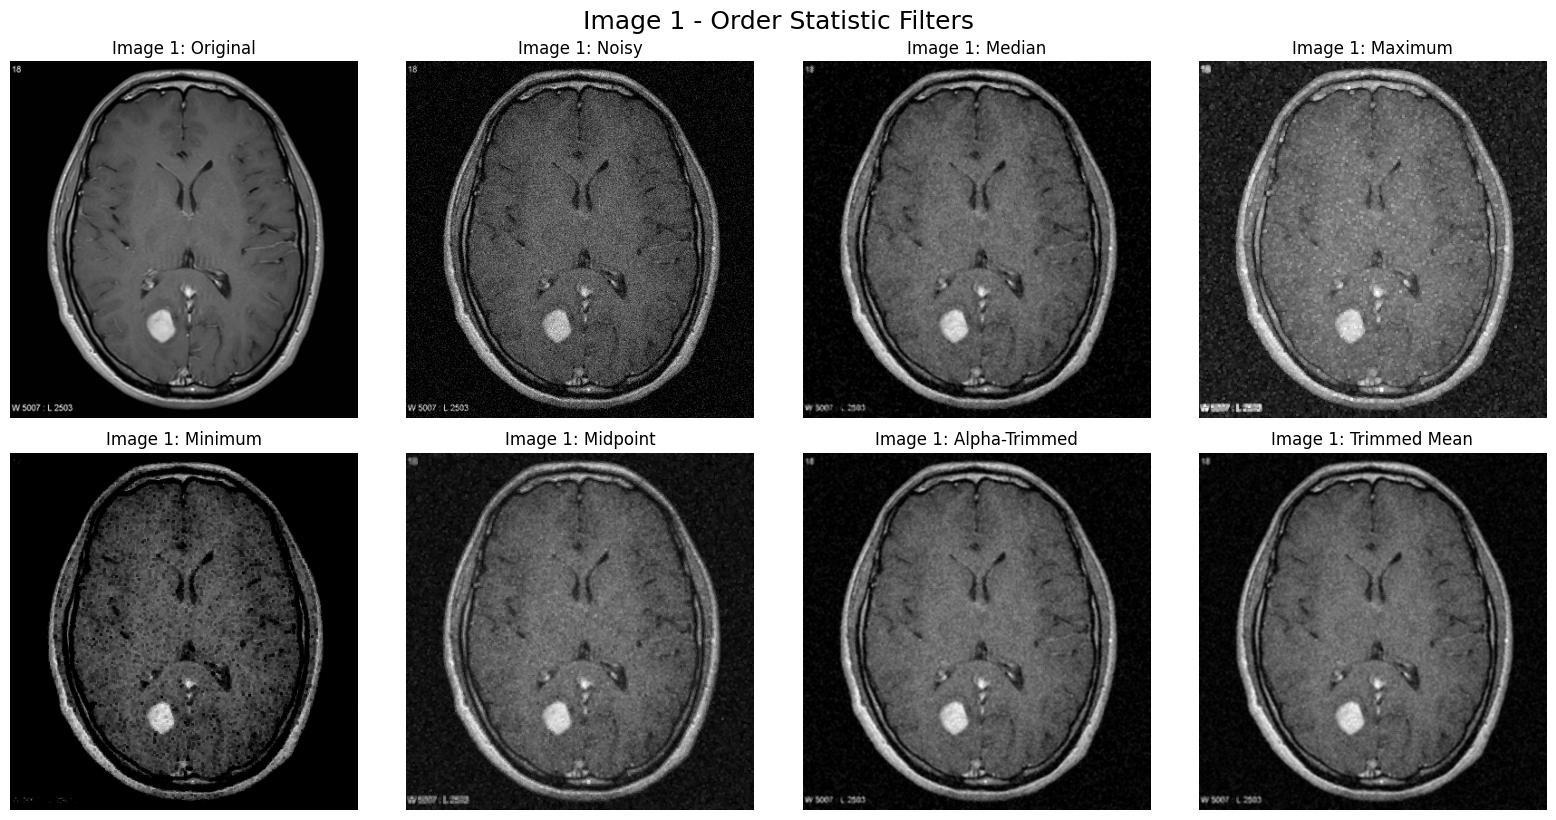

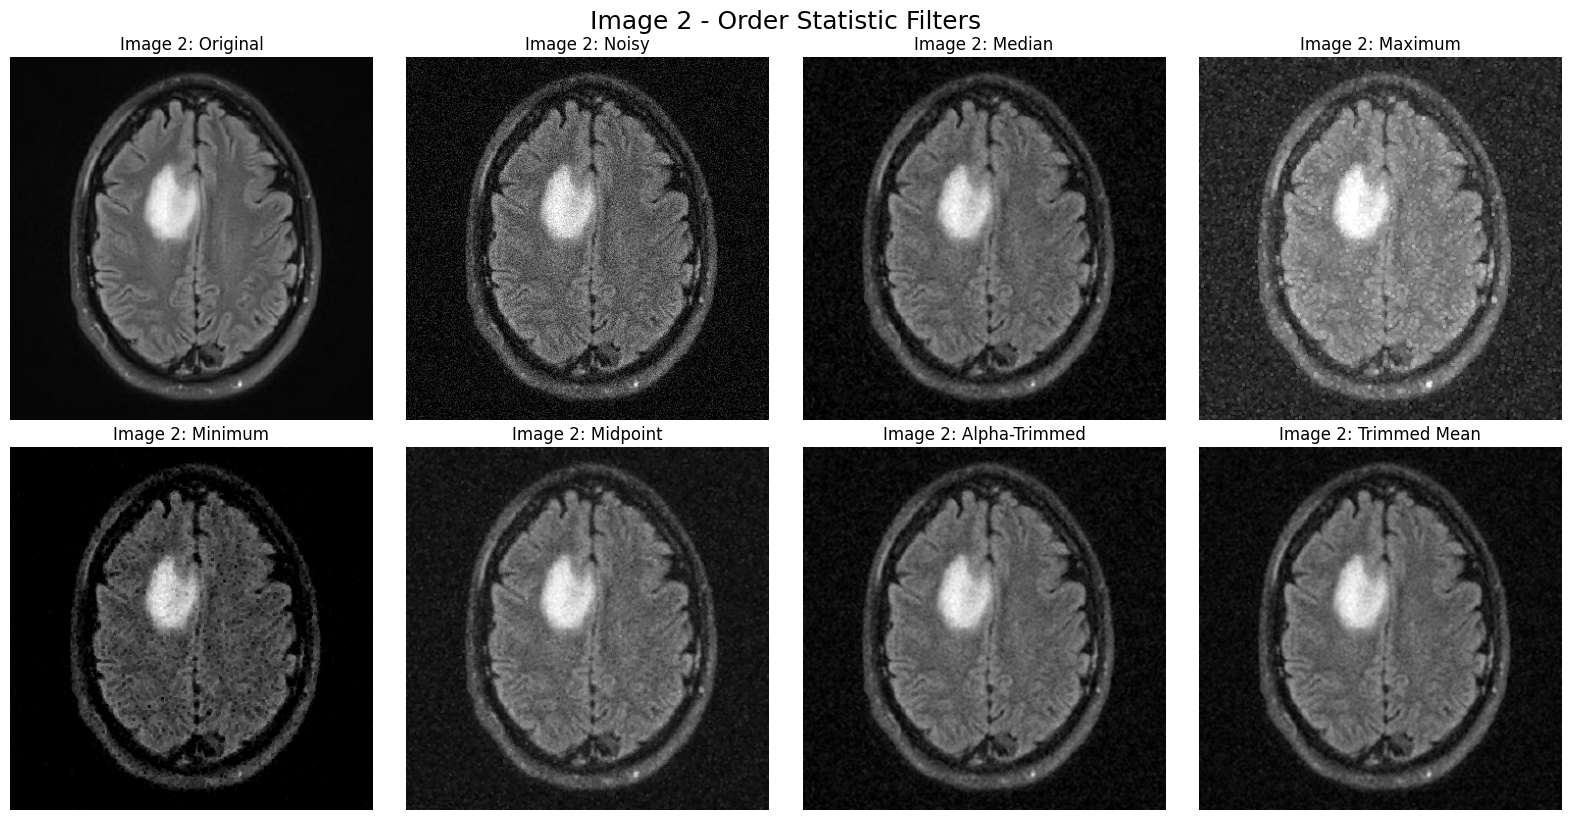


--- PSNR Comparisons ---
[Image 1] Median: 29.17 dB
[Image 1] Maximum: 16.93 dB
[Image 1] Minimum: 18.86 dB
[Image 1] Midpoint: 25.25 dB
[Image 1] Alpha-Trimmed: 29.95 dB
[Image 1] Trimmed Mean: 29.77 dB
[Image 2] Median: 29.62 dB
[Image 2] Maximum: 17.68 dB
[Image 2] Minimum: 19.92 dB
[Image 2] Midpoint: 27.77 dB
[Image 2] Alpha-Trimmed: 30.97 dB
[Image 2] Trimmed Mean: 31.39 dB


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, maximum_filter, minimum_filter


def add_gaussian_noise(image, mean=0, std=20):
    gauss = np.random.normal(mean, std, image.shape).astype('float32')
    noisy_img = image.astype('float32') + gauss
    noisy_img = np.clip(noisy_img, 0, 255).astype('uint8')
    return noisy_img


def midpoint_filter(image, size=3):
    max_filt = maximum_filter(image, size=size)
    min_filt = minimum_filter(image, size=size)
    mid = ((max_filt.astype(np.uint16) + min_filt.astype(np.uint16)) // 2).astype(np.uint8)
    return mid


def alpha_trimmed_mean_filter(image, size=3, d=4):
    assert d % 2 == 0, "d must be even"
    pad = size // 2
    padded = np.pad(image, pad, mode='reflect')
    output = np.zeros_like(image)

    for i in range(pad, padded.shape[0] - pad):
        for j in range(pad, padded.shape[1] - pad):
            window = padded[i - pad:i + pad + 1, j - pad:j + pad + 1].flatten()
            window.sort()
            trimmed = window[d//2 : -d//2]  # remove d/2 lowest and d/2 highest
            output[i - pad, j - pad] = np.mean(trimmed)

    return output.astype(np.uint8)


def psnr(original, filtered):
    mse = np.mean((original.astype(float) - filtered.astype(float)) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))


img1 = cv2.imread('/kaggle/input/lab-07/lab_07_image/Picture1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/kaggle/input/lab-07/lab_07_image/Picture2.png', cv2.IMREAD_GRAYSCALE)


def process_image(image):
    noisy = add_gaussian_noise(image)

    filters = {
        "Original": image,
        "Noisy": noisy,
        "Median": median_filter(noisy, size=3),
        "Maximum": maximum_filter(noisy, size=3),
        "Minimum": minimum_filter(noisy, size=3),
        "Midpoint": midpoint_filter(noisy, size=3),
        "Alpha-Trimmed": alpha_trimmed_mean_filter(noisy, size=3, d=4),
        "Trimmed Mean": alpha_trimmed_mean_filter(noisy, size=3, d=2)
    }

    return filters


filters_img1 = process_image(img1)
filters_img2 = process_image(img2)


def plot_filters(filters, title_prefix):
    titles = list(filters.keys())
    images = list(filters.values())

    plt.figure(figsize=(16, 8))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"{title_prefix}: {titles[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f"{title_prefix} - Order Statistic Filters", fontsize=18, y=1.02)
    plt.show()


plot_filters(filters_img1, "Image 1")
plot_filters(filters_img2, "Image 2")


print("\n--- PSNR Comparisons ---")
for name in list(filters_img1.keys())[2:]:  
    print(f"[Image 1] {name}: {psnr(filters_img1['Original'], filters_img1[name]):.2f} dB")
for name in list(filters_img2.keys())[2:]:
    print(f"[Image 2] {name}: {psnr(filters_img2['Original'], filters_img2[name]):.2f} dB")


Detect the tumor from the images using the segmentation approaches listed below:
(Outline the segmented object to highlight the tumor. You can crop the image for
accurate segmentation.)
i) Similarity approaches:
a) Local/Regional Thresholding
b) Global Thresholding
c) Variable Thresholding
d) Dynamic/Adaptive Thresholding
ii) Discontinuity approaches: Edge Detection (Sobel, Canny, Prewitt)

In [43]:
pip install opencv-python numpy matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.


=== TUMOR SEGMENTATION ANALYSIS ===
Applying various segmentation techniques to detect tumors in medical images

Segmentation Methods:
Similarity Approaches:
  - Global Thresholding (Otsu)
  - Local/Regional Thresholding
  - Variable Thresholding (Multi-Otsu)
  - Adaptive Thresholding

Discontinuity Approaches:
  - Sobel Edge Detection
  - Canny Edge Detection
  - Prewitt Edge Detection

Analyzing: /kaggle/input/lab-07/lab_07_image/Picture1.png
✓ Global Thresholding: Completed
✓ Local/Regional Thresholding: Completed
✓ Variable Thresholding: Completed
✓ Adaptive Thresholding: Completed
✓ Sobel Edge Detection: Completed
✓ Canny Edge Detection: Completed
✓ Prewitt Edge Detection: Completed


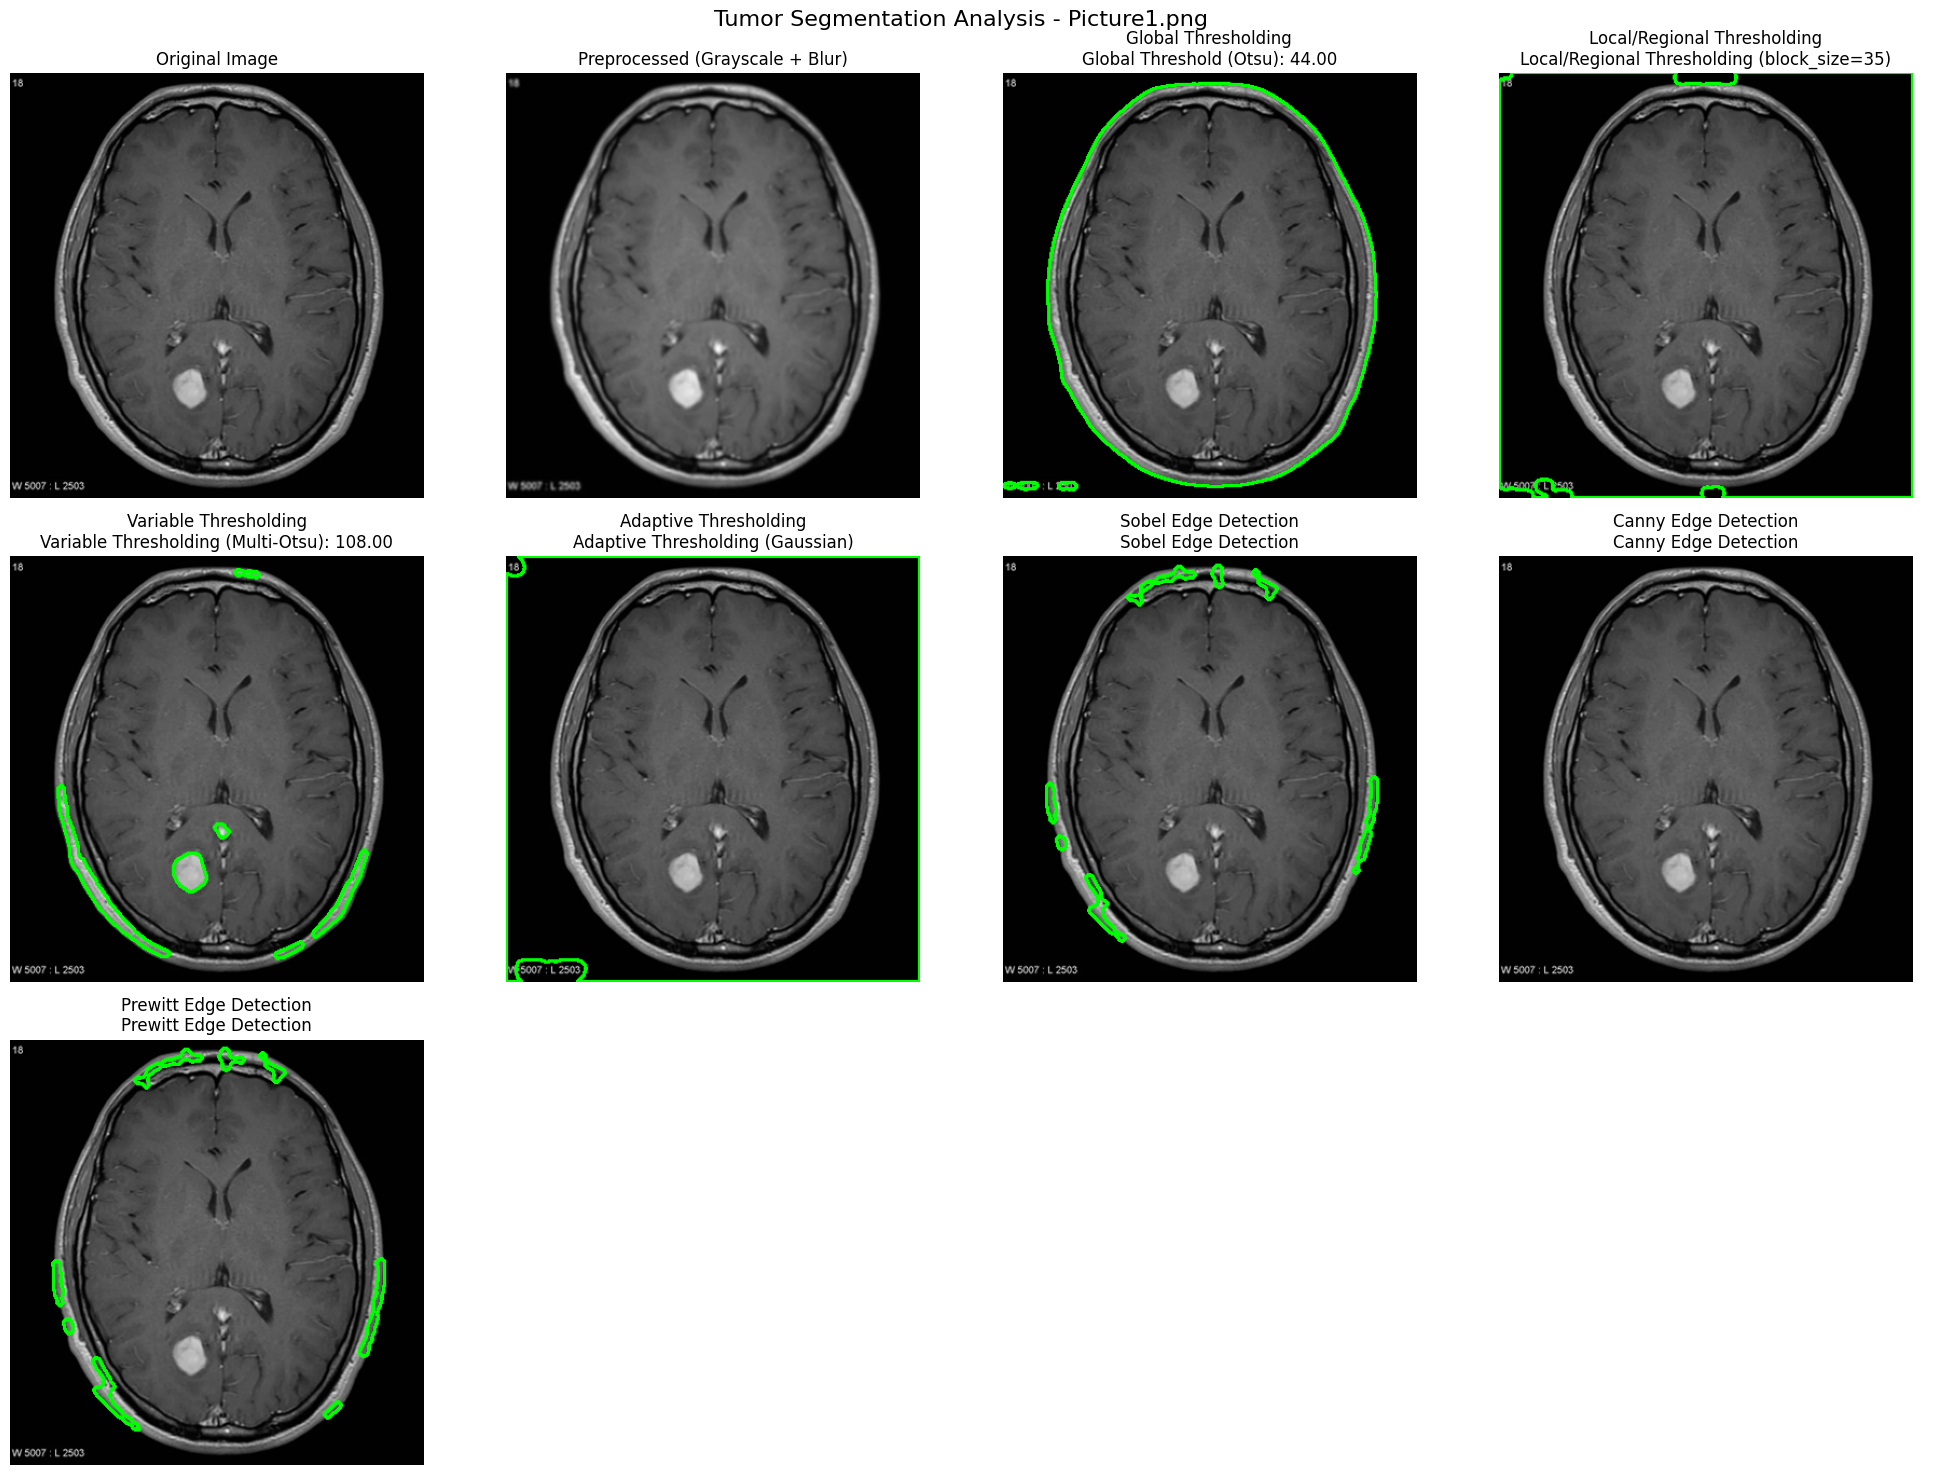


Analyzing: /kaggle/input/lab-07/lab_07_image/Picture2.png
✓ Global Thresholding: Completed
✓ Local/Regional Thresholding: Completed
✓ Variable Thresholding: Completed
✓ Adaptive Thresholding: Completed
✓ Sobel Edge Detection: Completed
✓ Canny Edge Detection: Completed
✓ Prewitt Edge Detection: Completed


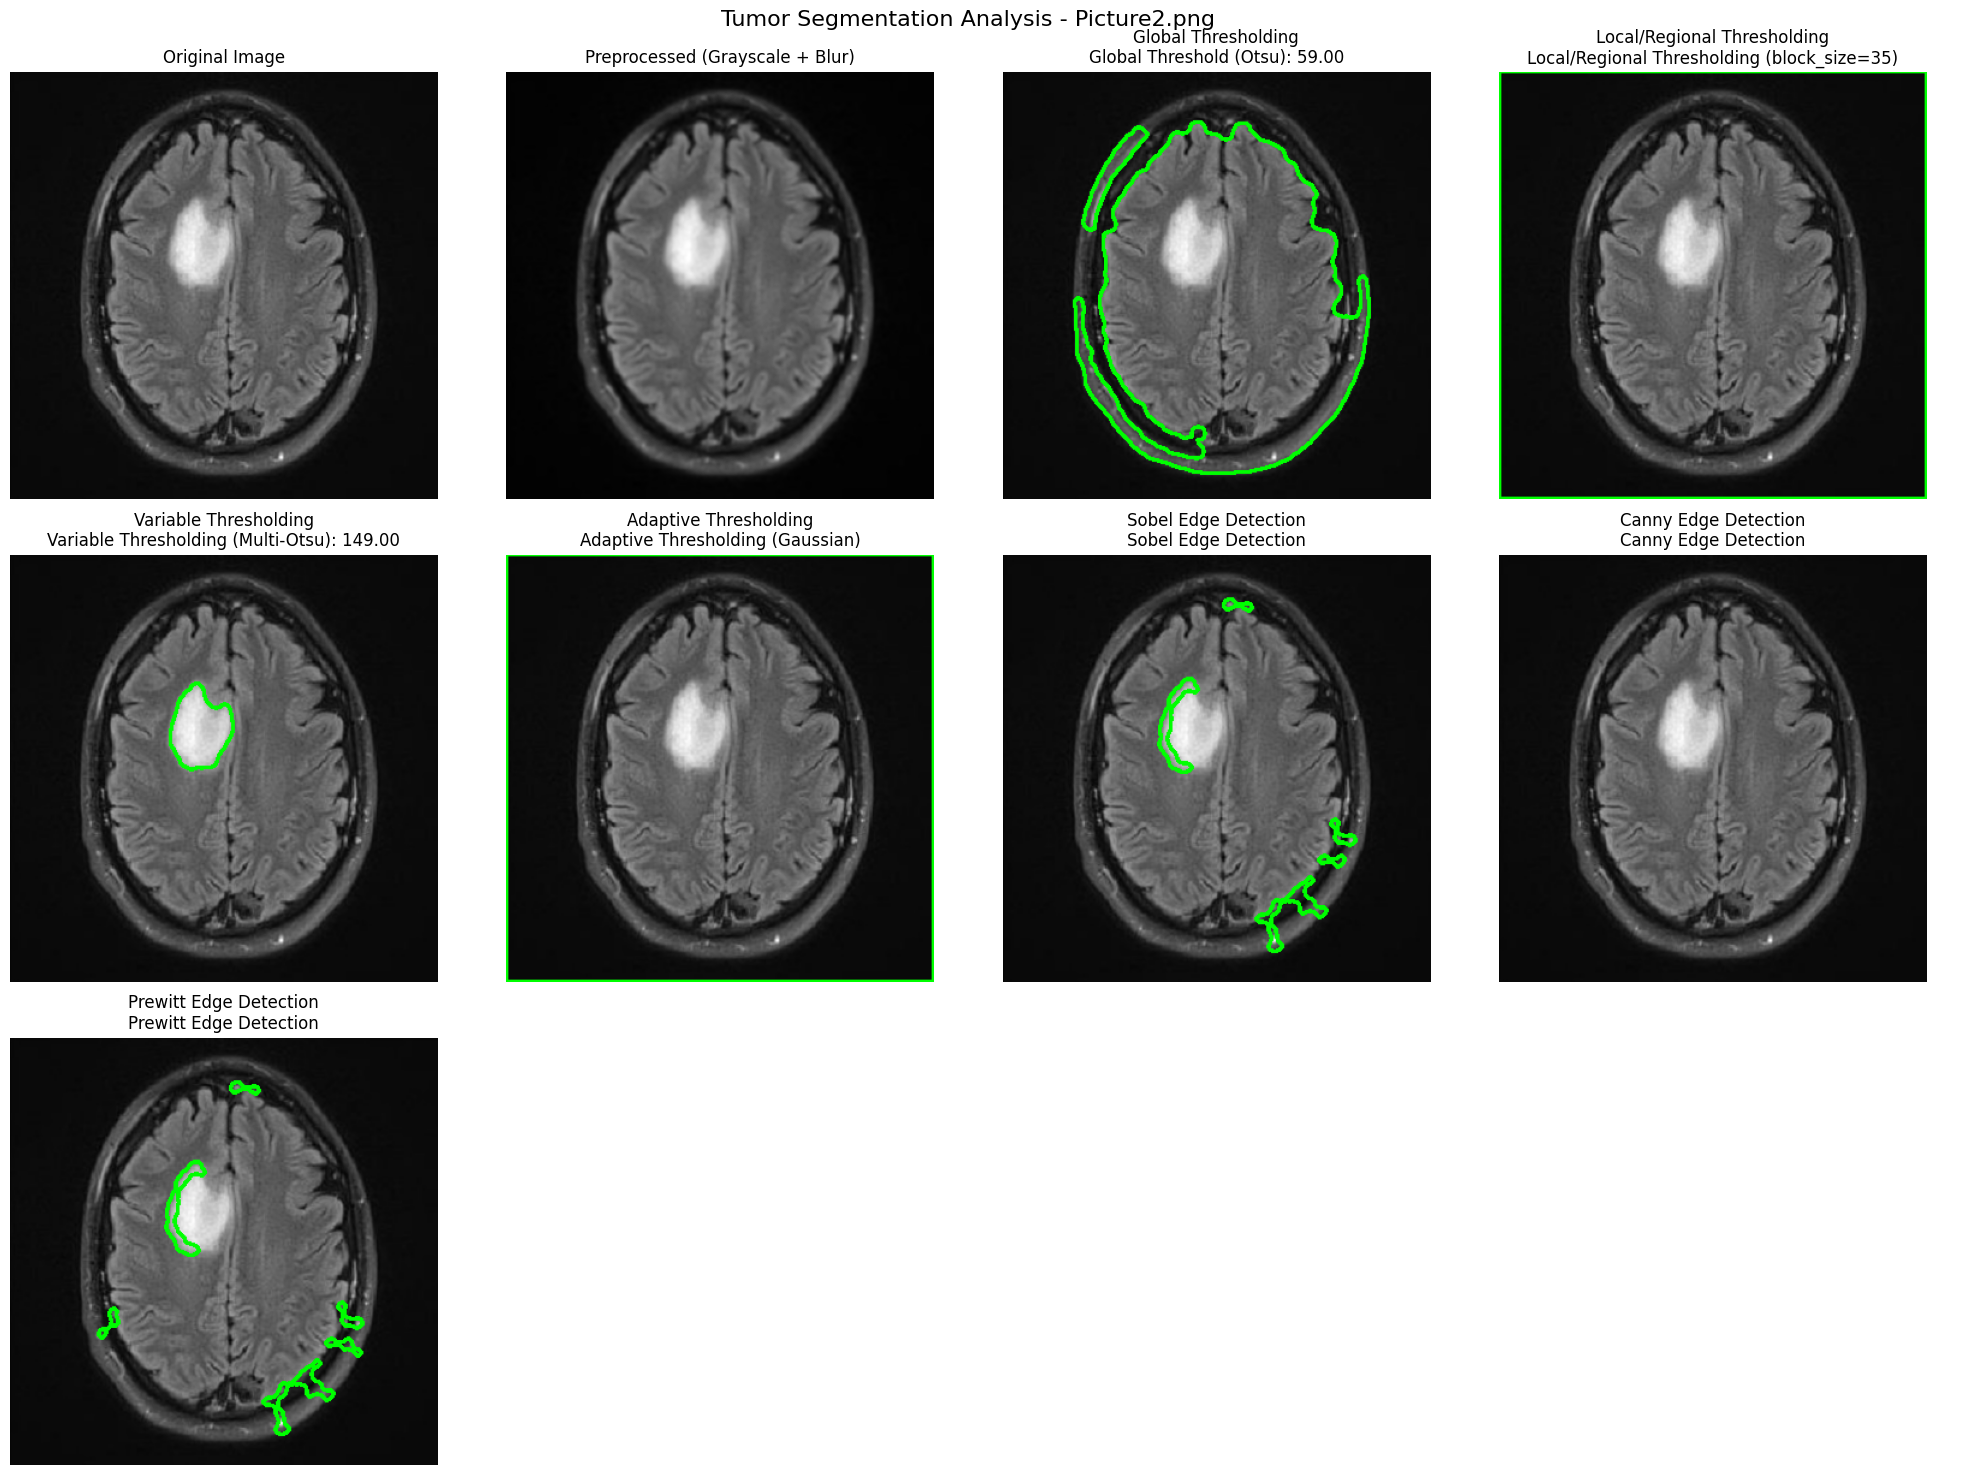


=== ANALYSIS COMPLETE ===
Check the 'segmentation_results' directory for individual segmented images

Recommendations for best results:
1. Global Thresholding: Good for images with clear intensity differences
2. Adaptive Thresholding: Best for varying illumination conditions
3. Canny Edge Detection: Excellent for tumor boundary detection
4. Combine multiple methods for robust segmentation


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, segmentation, measure
from skimage.filters import threshold_otsu, threshold_local, threshold_multiotsu
from skimage.morphology import opening, closing, disk
import os

def load_and_preprocess_image(image_path):
    """Load and preprocess the medical image"""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image from {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    return image, gray, blurred

def global_thresholding(image):
    """Apply global thresholding using Otsu's method"""
    threshold_val = threshold_otsu(image)
    binary = image > threshold_val
    return binary, f"Global Threshold (Otsu): {threshold_val:.2f}"

def local_regional_thresholding(image):
    """Apply local/regional thresholding"""
    # Use adaptive thresholding with different block sizes
    local_thresh = threshold_local(image, block_size=35, offset=10)
    binary = image > local_thresh
    return binary, "Local/Regional Thresholding (block_size=35)"

def variable_thresholding(image):
    """Apply variable thresholding using multi-Otsu"""
    try:
        thresholds = threshold_multiotsu(image, classes=3)
        # Use the higher threshold to segment potential tumor regions
        binary = image > thresholds[1]
        return binary, f"Variable Thresholding (Multi-Otsu): {thresholds[1]:.2f}"
    except:
        # Fallback to regular Otsu if multi-Otsu fails
        threshold_val = threshold_otsu(image)
        binary = image > threshold_val
        return binary, f"Variable Thresholding (Fallback Otsu): {threshold_val:.2f}"

def adaptive_thresholding(image):
    """Apply dynamic/adaptive thresholding using OpenCV"""
    # Convert to uint8 if needed
    if image.dtype != np.uint8:
        image_uint8 = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    else:
        image_uint8 = image
    
    binary = cv2.adaptiveThreshold(image_uint8, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 11, 2)
    return binary > 0, "Adaptive Thresholding (Gaussian)"

def sobel_edge_detection(image):
    """Apply Sobel edge detection"""
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Normalize and threshold
    sobel_normalized = ((sobel_combined - sobel_combined.min()) / 
                       (sobel_combined.max() - sobel_combined.min()) * 255).astype(np.uint8)
    
    # Apply threshold to create binary edge map
    _, binary = cv2.threshold(sobel_normalized, 50, 255, cv2.THRESH_BINARY)
    
    return binary > 0, "Sobel Edge Detection"

def canny_edge_detection(image):
    """Apply Canny edge detection"""
    # Convert to uint8 if needed
    if image.dtype != np.uint8:
        image_uint8 = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    else:
        image_uint8 = image
    
    edges = cv2.Canny(image_uint8, 50, 150)
    return edges > 0, "Canny Edge Detection"

def prewitt_edge_detection(image):
    """Apply Prewitt edge detection"""
    # Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
    
    prewitt_x = cv2.filter2D(image.astype(np.float32), -1, kernel_x)
    prewitt_y = cv2.filter2D(image.astype(np.float32), -1, kernel_y)
    
    prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)
    
    # Normalize and threshold
    prewitt_normalized = ((prewitt_combined - prewitt_combined.min()) / 
                         (prewitt_combined.max() - prewitt_combined.min()) * 255).astype(np.uint8)
    
    _, binary = cv2.threshold(prewitt_normalized, 50, 255, cv2.THRESH_BINARY)
    
    return binary > 0, "Prewitt Edge Detection"

def post_process_segmentation(binary_image, min_area=100):
    """Post-process segmentation to remove small artifacts and fill holes"""
    # Remove small objects
    cleaned = opening(binary_image, disk(3))
    
    # Fill holes
    filled = closing(cleaned, disk(5))
    
    # Remove very small regions
    labeled_image = measure.label(filled)
    regions = measure.regionprops(labeled_image)
    
    # Keep only regions above minimum area
    large_regions_mask = np.zeros_like(filled, dtype=bool)
    for region in regions:
        if region.area >= min_area:
            large_regions_mask[labeled_image == region.label] = True
    
    return large_regions_mask

def create_outlined_image(original_image, segmented_mask, color=(0, 255, 0), thickness=2):
    """Create an image with tumor outline highlighted"""
    result_image = original_image.copy()
    
    # Find contours
    contours, _ = cv2.findContours(segmented_mask.astype(np.uint8), 
                                  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours
    cv2.drawContours(result_image, contours, -1, color, thickness)
    
    return result_image

def analyze_image(image_path, output_dir="segmentation_results"):
    """Complete segmentation analysis for a single image"""
    print(f"\nAnalyzing: {image_path}")
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Load and preprocess image
    original, gray, preprocessed = load_and_preprocess_image(image_path)
    
    # Define all segmentation methods
    similarity_methods = [
        ("Global Thresholding", global_thresholding),
        ("Local/Regional Thresholding", local_regional_thresholding),
        ("Variable Thresholding", variable_thresholding),
        ("Adaptive Thresholding", adaptive_thresholding)
    ]
    
    discontinuity_methods = [
        ("Sobel Edge Detection", sobel_edge_detection),
        ("Canny Edge Detection", canny_edge_detection),
        ("Prewitt Edge Detection", prewitt_edge_detection)
    ]
    
    # Create figure for results
    total_methods = len(similarity_methods) + len(discontinuity_methods)
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f'Tumor Segmentation Analysis - {os.path.basename(image_path)}', fontsize=16)
    
    # Show original image
    axes[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    # Show preprocessed image
    axes[0, 1].imshow(preprocessed, cmap='gray')
    axes[0, 1].set_title('Preprocessed (Grayscale + Blur)')
    axes[0, 1].axis('off')
    
    # Process similarity approaches
    row, col = 0, 2
    for name, method in similarity_methods:
        try:
            segmented, method_info = method(preprocessed)
            
            # Post-process
            cleaned_segmentation = post_process_segmentation(segmented)
            
            # Create outlined image
            outlined = create_outlined_image(original, cleaned_segmentation)
            
            # Display results
            axes[row, col].imshow(cv2.cvtColor(outlined, cv2.COLOR_BGR2RGB))
            axes[row, col].set_title(f'{name}\n{method_info}')
            axes[row, col].axis('off')
            
            # Save individual result
            filename = f"{os.path.basename(image_path).split('.')[0]}_{name.replace('/', '_').replace(' ', '_')}.png"
            cv2.imwrite(os.path.join(output_dir, filename), outlined)
            
            print(f"✓ {name}: Completed")
            
        except Exception as e:
            print(f"✗ {name}: Error - {str(e)}")
            axes[row, col].text(0.5, 0.5, f'Error in\n{name}', 
                               ha='center', va='center', transform=axes[row, col].transAxes)
            axes[row, col].axis('off')
        
        col += 1
        if col >= 4:
            row += 1
            col = 0
    
    # Process discontinuity approaches
    for name, method in discontinuity_methods:
        try:
            segmented, method_info = method(preprocessed)
            
            # Post-process
            cleaned_segmentation = post_process_segmentation(segmented)
            
            # Create outlined image
            outlined = create_outlined_image(original, cleaned_segmentation)
            
            # Display results
            axes[row, col].imshow(cv2.cvtColor(outlined, cv2.COLOR_BGR2RGB))
            axes[row, col].set_title(f'{name}\n{method_info}')
            axes[row, col].axis('off')
            
            # Save individual result
            filename = f"{os.path.basename(image_path).split('.')[0]}_{name.replace(' ', '_')}.png"
            cv2.imwrite(os.path.join(output_dir, filename), outlined)
            
            print(f"✓ {name}: Completed")
            
        except Exception as e:
            print(f"✗ {name}: Error - {str(e)}")
            axes[row, col].text(0.5, 0.5, f'Error in\n{name}', 
                               ha='center', va='center', transform=axes[row, col].transAxes)
            axes[row, col].axis('off')
        
        col += 1
        if col >= 4:
            row += 1
            col = 0
    
    # Hide any unused subplots
    for i in range(row, 3):
        for j in range(col if i == row else 0, 4):
            axes[i, j].axis('off')
    
    plt.tight_layout()
    
    # Save the complete comparison
    comparison_filename = f"{os.path.basename(image_path).split('.')[0]}_complete_analysis.png"
    plt.savefig(os.path.join(output_dir, comparison_filename), dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def main():
    """Main function to run the complete analysis"""
    # Image paths
    image_paths = [
        "/kaggle/input/lab-07/lab_07_image/Picture1.png",
        "/kaggle/input/lab-07/lab_07_image/Picture2.png"
    ]
    
    print("=== TUMOR SEGMENTATION ANALYSIS ===")
    print("Applying various segmentation techniques to detect tumors in medical images")
    print("\nSegmentation Methods:")
    print("Similarity Approaches:")
    print("  - Global Thresholding (Otsu)")
    print("  - Local/Regional Thresholding")
    print("  - Variable Thresholding (Multi-Otsu)")
    print("  - Adaptive Thresholding")
    print("\nDiscontinuity Approaches:")
    print("  - Sobel Edge Detection")
    print("  - Canny Edge Detection")
    print("  - Prewitt Edge Detection")
    
    # Process each image
    for image_path in image_paths:
        if os.path.exists(image_path):
            try:
                analyze_image(image_path)
            except Exception as e:
                print(f"Error processing {image_path}: {str(e)}")
        else:
            print(f"Warning: Image not found at {image_path}")
    
    print("\n=== ANALYSIS COMPLETE ===")
    print("Check the 'segmentation_results' directory for individual segmented images")
    print("\nRecommendations for best results:")
    print("1. Global Thresholding: Good for images with clear intensity differences")
    print("2. Adaptive Thresholding: Best for varying illumination conditions")
    print("3. Canny Edge Detection: Excellent for tumor boundary detection")
    print("4. Combine multiple methods for robust segmentation")

if __name__ == "__main__":
    main()